# 4장. 이미지 프로세싱 기초
### 1. Region Of Interest 
### 2. color space
### 3. threshold
### 4. image arithmetic
### 5. histogram
### 6. workshop

## 1. 관심영역 (Region Of Interest, ROI)
* 전체 이미지에서 연산과 분석의 대상이 되는 영역만을 지정하고 떼어내는 것을 관심영역(regin of interest, ROI)을 지정한다고 한다. 


In [5]:
# 관심영역 지정
import cv2
import numpy as np
img = cv2.imread('../insightbook.opencv_project_python-master/img/sunset.jpg')

x = 320; y = 150; w = 50; h = 50          # roi 좌표. 사진에서 왼쪽경계로부터 320, 위로부터 150, 크기는 가로 50, 세로 50

roi = img[y:y+h, x:x+w]       # 관심영역을 지정하는 코드

print(roi.shape)
cv2.rectangle(roi, (0,0), (h-1, w-1), (0,255,0))
cv2.imshow('img', img)

key = cv2.waitKey(0)
print(key)
cv2.destroyAllWindows()

(50, 50, 3)
108


In [7]:
# roi 영역 복제 및 새 창 띄우기
import cv2
import numpy as np
img = cv2.imread('../insightbook.opencv_project_python-master/img/sunset.jpg')

x = 320; y = 150; w = 50; h = 50          # roi 좌표. 사진에서 왼쪽경계로부터 320, 위로부터 150, 크기는 가로 50, 세로 50

roi = img[y:y+h, x:x+w]       # 관심영역을 지정하는 코드. 
img2 = roi.copy()

img[y:y+h, x+w:x+w+w] = roi
cv2.rectangle(img, (x,y), ( x+w+w, y+h), (0,255,0))

cv2.imshow('img', img)        # 원본이미지 출력
cv2.imshow('roi', img2)       # roi 만 따로 출력

key = cv2.waitKey(0)
print(key)
cv2.destroyAllWindows()

108


In [10]:
# 마우스로 관심영역 지정

import cv2
import numpy as np
isDragging = False                      # 마우스 드래그 상태 저장
x0, y0, w, h = -1,-1,-1,-1              # 영역 선택 좌표 저장
blue, red = (255,0,0),(0,0,255)         # 색상 값
def onMouse(event,x,y,flags,param):     # 마우스 이벤트 핸들 함수  ---①
    global isDragging, x0, y0, img      # 전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작 ---②
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임 ---③
        if isDragging:                  # 드래그 진행 중
            img_draw = img.copy()       # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw) # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업 ---④
        if isDragging:                  # 드래그 중지
            isDragging = False
            w = x - x0                  # 드래그 영역 폭 계산
            h = y - y0                  # 드래그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            if w > 0 and h > 0:         # 폭과 높이가 음수이면 드래그 방향이 옳음 ---⑤
                img_draw = img.copy()   # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간 사각형 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2)
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영영만 ROI로 지정 ---⑥
                cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                cv2.imwrite('./cropped.jpg', roi)   # ROI 영역만 파일로 저장 ---⑦
                print("croped.")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림ㅇㅣ 없는 원본 이미지 출력
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")
img = cv2.imread('../insightbook.opencv_project_python-master/img/sunset.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록 ---⑧
cv2.waitKey()
cv2.destroyAllWindows()

x:267, y:105, w:161, h:136
croped.


## 2. color space
* 디지털 영상의 종류
* RGB, BGR, RGBA
    * RGB 이미지는 3차원 배열
    * 읽기 옵션
        1. cv2.IMREAD_COLOR : 컬러(BGR) 스케일, 기본값, 1, 투명영역 무시
        2. cv2.IMREAD_UNCHANGED : 파일에 저장된 스케일, -1, 투명영역까지 포함
        2. cv2.IMREAD_GRAYSCALE : 그레이 스케일, 0
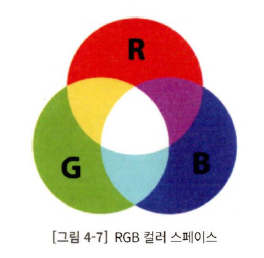


In [1]:
# BGR, BGRA, Alpha
import cv2
import numpy as np

img = cv2.imread('../insightbook.opencv_project_python-master/img/opencv_logo.png')
bgr = cv2.imread('../insightbook.opencv_project_python-master/img/opencv_logo.png', cv2.IMREAD_COLOR)
bgra = cv2.imread('../insightbook.opencv_project_python-master/img/opencv_logo.png', cv2.IMREAD_UNCHANGED)

print('default:', img.shape, ' color:', bgr.shape, ' unchaged:', bgra.shape)

cv2.imshow('bgr', bgr)
cv2.imshow('bgra', bgra)
cv2.imshow('alpha', bgra[:,:,2])  # red 영역만 가져오도록 표시
cv2.imshow('alpha', bgra[:,:,3])  # 투명도만 가져오도록 표시    bgra 3개의 차원. 4개의 채널
cv2.waitKey(0)
cv2.destroyAllWindows()

default: (120, 98, 3)  color: (120, 98, 3)  unchaged: (120, 98, 4)


* COLOR 변환 함수
    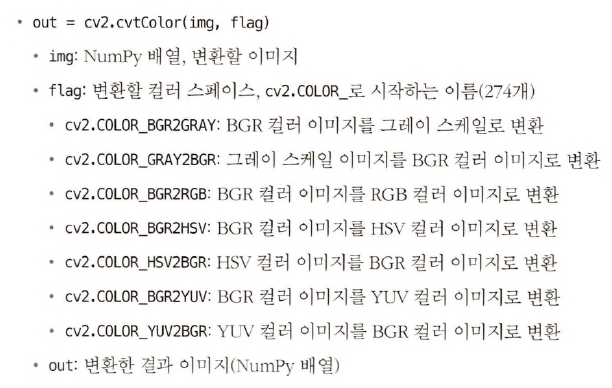

In [5]:
# 흑백으로 변환
import cv2 
import numpy as np

img = cv2.imread('../insightbook.opencv_project_python-master/img/girl.jpg')
img2 = img.astype(np.uint16)      #검은색 사진

b,g,r = cv2.split(img2)

gray1 = ((b+g+r)/3).astype(np.uint8)     # 방법1    색깔을 평균
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     # 방법2.   cv2 내장함수

cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
cv2.imshow('img2', img2)

In [8]:
((b+g+r)/3).astype(np.uint8)

array([[ 66,  61,  57, ...,  50,  55,  59],
       [ 65,  61,  57, ...,  52,  56,  59],
       [ 64,  60,  57, ...,  54,  57,  59],
       ...,
       [ 63,  72,  82, ..., 203, 204, 205],
       [ 62,  72,  83, ..., 203, 205, 207],
       [ 60,  71,  82, ..., 207, 209, 212]], dtype=uint8)

* BGR, HSV, ... , YUV, YCbCr


In [4]:
import cv2
import numpy as np
print("OpenCV version:")
print(cv2.__version__)
img = cv2.imread("../insightbook.opencv_project_python-master/img/girl.jpg")
print("width: {} pixels".format(img.shape[1]))
print("height: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))
(height, width) = img.shape[:2]
center = (width // 2, height // 2)
cv2.imshow("girl", img)
(Blue, Green, Red) = cv2.split(img)
cv2.imshow("Red Channel", Red)
cv2.imshow("Green Channel", Green)
cv2.imshow("Blue Channel", Blue)
cv2.waitKey(0)
zeros = np.zeros(img.shape[:2], dtype = "uint8")
cv2.imshow("Red", cv2.merge([zeros, zeros, Red]))
cv2.imshow("Green", cv2.merge([zeros, Green, zeros]))
cv2.imshow("Blue", cv2.merge([Blue, zeros, zeros]))
cv2.waitKey(0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Filter", gray)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV Filter", hsv)
# lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2.imshow("YUV Filter", yuv)
cv2.waitKey(0)
BGR = cv2.merge([Blue, Green, Red])
cv2.imshow("Blue, Green and Red", BGR)
cv2.waitKey(0)
cv2.destroyAllWindows()

OpenCV version:
4.8.0
width: 406 pixels
height: 293 pixels
channels: 3


## 3. Thresholding
* binarization

* simple global fixed threshold
    * 임의의 임계값 선정
    * numpy masking
    * 
* Otsu's Binarization Method
    * 오츠 노부유키 제안, 1979
    * 모든 픽셀을 밝기 기분으로 두 클래스로 분류
    * 중간 지점을 임계점으로 적용
    * 방법
        * 임계값 t로 영상 픽셀들을 두 클래스로 분류

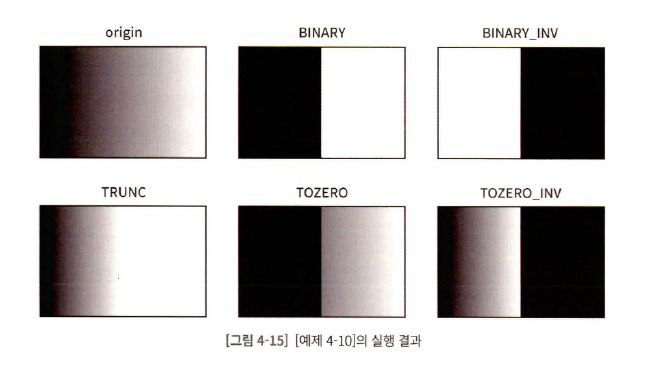
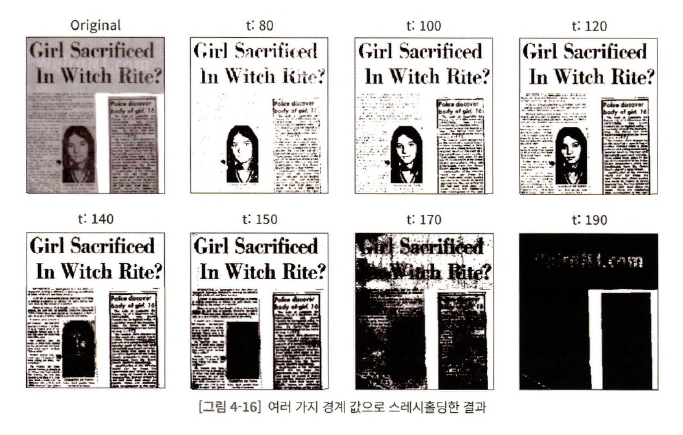
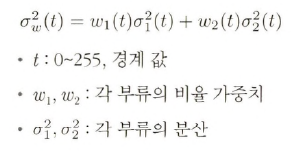

otsu threshold:  131.0


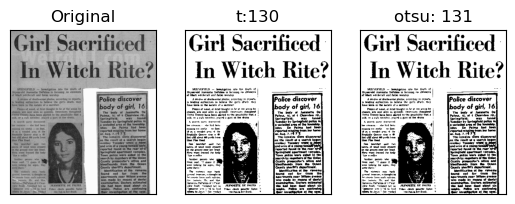

In [10]:
# simple global fixed threshold
# bimodal imgage에 사용하기 적합한 
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('../insightbook.opencv_project_python-master/img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE)

_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)   # 경계값을 130으로 지정 (방법1)

#경계값을 지정하지 않고 OTSU 알고리즘 선택 (방법2)
t, t_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold: ', t)   # otsu 알고리즘으로 선택된 경계값 출력

imgs = {'Original': img, 't:130': t_130, 'otsu: %d'%t: t_otsu}
for i ,(key, value)in enumerate(imgs.items()):
    plt.subplot(1,3, i+1)
    plt.title(key)

    plt.imshow(value, cmap= 'gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

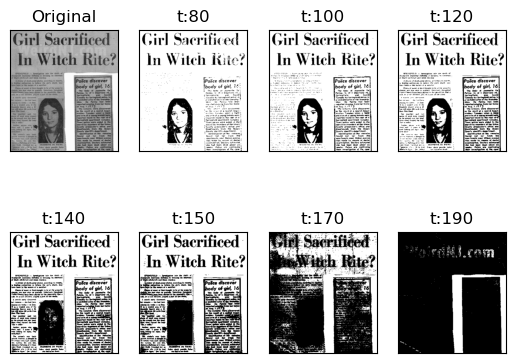

In [12]:
#thresholds.py
import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('../insightbook.opencv_project_python-master/img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기
thresholds = [80, 100, 120, 140, 150, 170, 190]
imgs = {'Original' : img}
for t in thresholds:
    _, t_img = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
    imgs['t:%d'%t] = t_img
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 4, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])
plt.show()

### adaptive threshold
* 스도쿠 scan example
* 이미지를 작은 영역으로 나누어서 임계치를 적용
* block_size : 홀수만 가능, 1보다는 큰 값
* c: 일반적으로 양수의 값을 사용

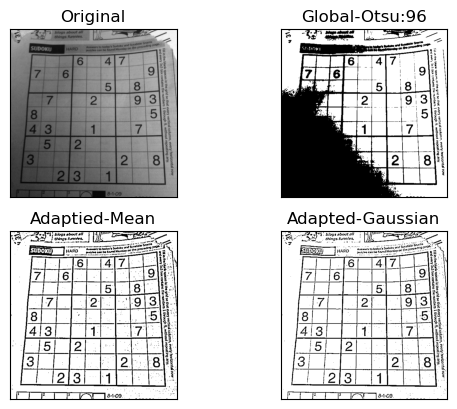

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

blk_size = 9    # 블록 사이즈
C = 5 #차감 상수
img = cv2.imread('../insightbook.opencv_project_python-master/img/sudoku.png', cv2.IMREAD_GRAYSCALE)   #그레이 스케일로 읽기
# 1. 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 2. 어뎁티드 스레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, 'Adaptied-Mean' :th2, 'Adapted-Gaussian': th3}

for i,(k,v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]), plt.yticks([])
plt.show()

## 4. Image Arithmetic

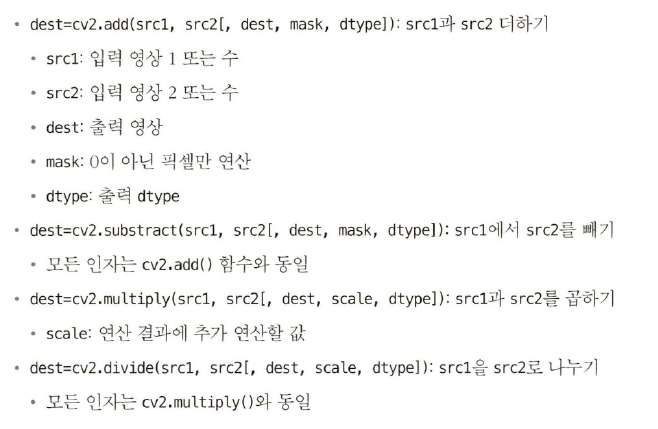

### Image Addition

In [24]:
# 영상의 사칙연산(p.127)
import cv2
import numpy as np

a = np.uint8([[200, 50]])
b = np.uint8([[100, 100]])

add1 = a + b   
sub1 = a - b
mult1 = a * 2
div1 = a / 3

add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a, 2)
div2 = cv2.divide(a, 3)

print(add1, add2) 
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


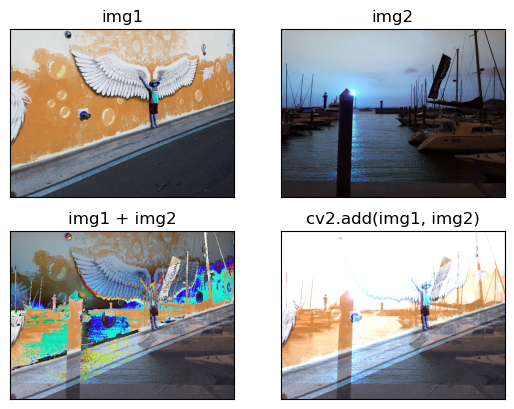

In [27]:
import cv2
import numpy as np
import matplotlib.pylab as plt
img1 = cv2.imread('../insightbook.opencv_project_python-master/img/wing_wall.jpg')
img2 = cv2.imread('../insightbook.opencv_project_python-master/img/yate.jpg')

img3 = img1+ img2     # 더하기 연산
img4 = cv2.add(img1, img2)     # OpenCV 함수

imgs = {'img1': img1, 'img2': img2, 'img1 + img2': img3, 'cv2.add(img1, img2)': img4}

for i,(k,v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]), plt.yticks([])
plt.show()

### Alpha Blending
남자의 얼굴과 사자의 얼굴을 알파블렌딩하는데 트랙바로 알파값을 조정할 수 있다. 
* 2개의 이미지 혼합
* 가중치 지정, alpha: beta, alpha + beta = 1
* a $\times$ alpha + b $\times$ beta <= 255
* numpy로 직접 구현
$ g(x) = (1-\alpha)f_0(x) + \alpha f_1(x)$

In [29]:
# p.132
import cv2
import numpy as np
win_name = 'Alpha blending'
trackbar_name = 'fade'

def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)
    
img1 = cv2.imread('../insightbook.opencv_project_python-master/img/man_face.jpg')
img2 = cv2.imread('../insightbook.opencv_project_python-master/img/lion_face.jpg')

cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)
cv2.waitKey()
cv2.destroyAllWindows()

### Bitwise Operation 
* 이미지의 각 픽셀에 대해 bitwise 연산
* 배경제거, 전경과 배경분리,  합성 등에 활용
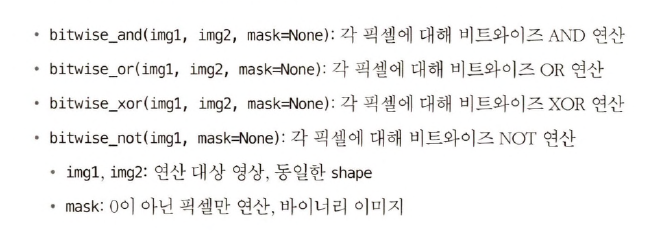

### 참고자료
* https://en.wikipedia.org/wiki/Bitwise_operation
* https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html


In [6]:
# p.135
import numpy as np, cv2
import matplotlib.pylab as plt

#이미지 읽기 
img = cv2.imread('../insightbook.opencv_project_python-master/img/girl.jpg')

# 마스크 만들기 
mask = np.zeros_like(img)    # 어떤 특정 array와 같은(like)사이즈,크기(shape)의 zeros array 반환. 여기서는 img크기의 검은색사진
cv2.circle(mask, (150, 140), 100, (255, 255, 255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#마스킹
masked = cv2.bitwise_and(img, mask)

# 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

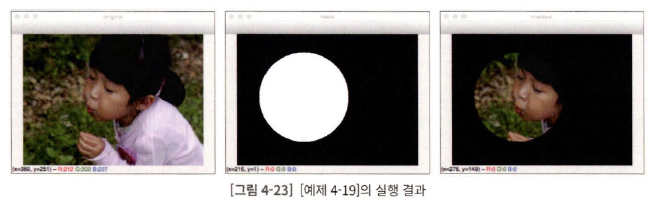

### Diff Image
* 차영상. 영상에서 영상 빼기
* 틀린그림 찾기
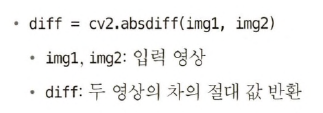

In [9]:
import numpy as np, cv2
img1 = cv2.imread('../insightbook.opencv_project_python-master/img/robot_arm1.jpg')
img2 = cv2.imread('../insightbook.opencv_project_python-master/img/robot_arm2.jpg')

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)
#차 영상을 극대화 하기 위해 스레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

#두번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

#결과 영상 출력
cv2.imshow('img1', img1); cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()


### HSV Color Masking

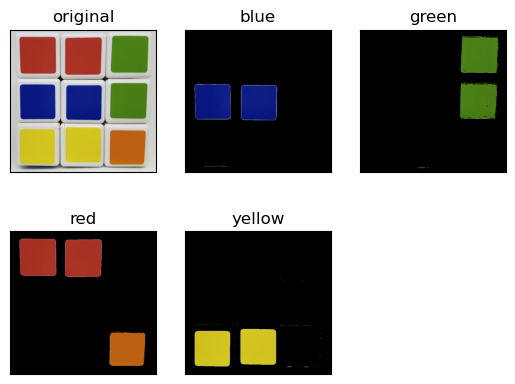

In [11]:
#arithmatic.py
import cv2
import numpy as np
import matplotlib.pylab as plt
#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("../insightbook.opencv_project_python-master/img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])
# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)
#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)
#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green,
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

### Histogram